In [2]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
import numpy as np

In [30]:
import pandas as pd
from catboost import CatBoostRegressor, Pool

# 데이터 로드
data_path = 'preprocessed.csv'  # 실제 경로로 변경
data = pd.read_csv(data_path)
data = pd.DataFrame(data)
# 범주형 변수 지정
categorical_features = ['card_tpbuz_cd', '상권변동지표구분']

# 데이터 분할 (예시)
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Pool 객체 생성
train_pool = Pool(data=train_data.drop(columns=['amt']),
                  label=train_data['amt'],
                  cat_features=categorical_features)

test_pool = Pool(data=test_data.drop(columns=['amt']),
                 label=test_data['amt'],
                 cat_features=categorical_features)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5]
}

# 모델 초기화
model = CatBoostRegressor(verbose=100)

# 하이퍼파라미터 튜닝 수행
grid_search_result = model.grid_search(param_grid, 
                                       X=train_pool, 
                                       cv=3, 
                                       partition_random_seed=42, 
                                       refit=True)

print("Best parameters found: ", grid_search_result['params'])
# 최적의 하이퍼파라미터로 모델 학습
best_model = grid_search_result['model']
best_model.fit(train_pool)

# 모델 저장
best_model.save_model('catboost_amt_best_model.cbm')
print("Best model saved to 'catboost_amt_best_model.cbm'")

# 범주형 변수 목록 저장
import pickle
with open('categorical_features.pkl', 'wb') as f:
    pickle.dump(categorical_features, f)
print("Categorical features saved to 'categorical_features.pkl'")


0:	learn: 2127118620.0025089	test: 2383974964.2591076	best: 2383974964.2591076 (0)	total: 77.2ms	remaining: 38.5s
100:	learn: 1894489251.3234186	test: 2197898980.1307120	best: 2197898980.1307120 (100)	total: 7.47s	remaining: 29.5s
200:	learn: 1827443569.5432541	test: 2144108802.2085226	best: 2144108802.2085226 (200)	total: 14.4s	remaining: 21.5s
300:	learn: 1709057292.7019081	test: 2010266467.5867715	best: 2010266467.5867715 (300)	total: 21.8s	remaining: 14.4s
400:	learn: 1596495371.1092167	test: 1884478288.0308611	best: 1884478288.0308611 (400)	total: 29.4s	remaining: 7.25s
499:	learn: 1475545798.6154745	test: 1731858249.8801570	best: 1731858249.8801570 (499)	total: 37s	remaining: 0us

bestTest = 1731858250
bestIteration = 499

0:	loss: 1731858249.8801570	best: 1731858249.8801570 (0)	total: 37.3s	remaining: 32m 54s
0:	learn: 2091349507.0322311	test: 2352011741.9588084	best: 2352011741.9588084 (0)	total: 81.6ms	remaining: 40.7s
100:	learn: 998952282.3130645	test: 1180996514.2610660	bes

KeyboardInterrupt: 

In [ ]:
# 하이퍼파라미터 범위 설정
param_grid = {
    'iterations': [500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.2, 0.5, 1.0, 2.0]
}

# 랜덤 서치 수행
model = CatBoostRegressor(eval_metric='RMSE', verbose=100)

random_search_result = model.randomized_search(
    param_grid,
    X=train_pool,
    cv=3,  # Cross-validation folds
    partition_random_seed=42,
    n_iter=10,  # Number of parameter settings that are sampled
    search_by_train_test_split=False,
    refit=True
)
print("Best parameters found: ", random_search_result['params'])

# 모델 저장
model.save_model('catboost_amt_best_model_randomSearch.cbm')
print("Best model saved to 'catboost_amt_best_model.cbm'")

Training on fold [0/3]
0:	learn: 2027837214.8997903	test: 2364248090.4027629	best: 2364248090.4027629 (0)	total: 74.4ms	remaining: 37.1s
100:	learn: 1036479323.8221306	test: 1198813891.7989149	best: 1198813891.7989149 (100)	total: 7.2s	remaining: 28.5s
200:	learn: 741222390.1078104	test: 821627948.6758692	best: 821627948.6758692 (200)	total: 14s	remaining: 20.8s
300:	learn: 589774520.1618221	test: 639129522.0607908	best: 639129522.0607908 (300)	total: 21s	remaining: 13.9s
400:	learn: 519118037.3586637	test: 582731743.4046518	best: 582731743.4046518 (400)	total: 27.9s	remaining: 6.89s
499:	learn: 457620184.8733098	test: 521457562.3670696	best: 521457562.3670696 (499)	total: 34.6s	remaining: 0us

bestTest = 521457562.4
bestIteration = 499

Training on fold [1/3]
0:	learn: 2032648118.9150584	test: 2355321725.6997190	best: 2355321725.6997190 (0)	total: 79.4ms	remaining: 39.6s
100:	learn: 1027470955.1842080	test: 1424465691.9217844	best: 1424465691.9217844 (100)	total: 7.17s	remaining: 28.3

In [ ]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
import pickle

# 저장된 모델 및 범주형 변수 목록 불러오기
model = CatBoostRegressor()
model.load_model('catboost_amt_model.cbm')

with open('categorical_features.pkl', 'rb') as f:
    categorical_features = pickle.load(f)
print(categorical_features)
# 예측할 데이터 (입력 예시)
data = {
    "admi_cty_no": [41210510],
    "card_tpbuz_cd": ["Y02"],
    "amt": [633562],  # 예측에서는 사용되지 않음
    "cnt": [28],
    "TOTAL_POPULATION": [13850.98],
    "운영점포평균영업기간": [188.5],
    "폐업점포평균영업기간": [358.0],
    "상권변동지표구분": ["HH"]
}

input_df = pd.DataFrame(data)

# Pool 객체 생성
input_pool = Pool(data=input_df.drop(columns=['amt']), cat_features=categorical_features)

# 예측 수행
predictions = model.predict(input_pool)

print("Predictions:", predictions)


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
r2 = r2_score(y_true, y_pred)

In [9]:
y_pred = model.predict(test_pool)
y_true = test_data['amt']

In [11]:
r2

0.9826926699329132

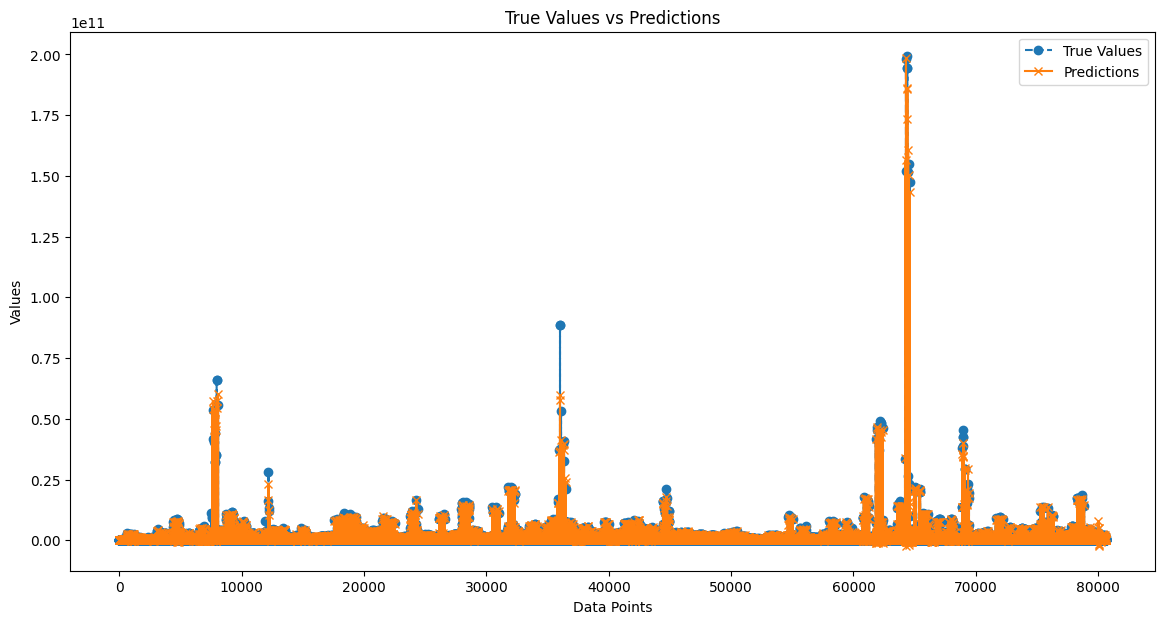

In [26]:
# 꺾은선 그래프
plt.figure(figsize=(14, 7))
plt.plot(y_true.values, label='True Values', linestyle='--', marker='o')
plt.plot(y_pred, label='Predictions', linestyle='-', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

Mean Squared Error (MSE): 8.68128754359364e+16
Root Mean Squared Error (RMSE): 294640247.4814607
Mean Absolute Error (MAE): 67281404.08573963
R² (R-squared): 0.9826926699329132


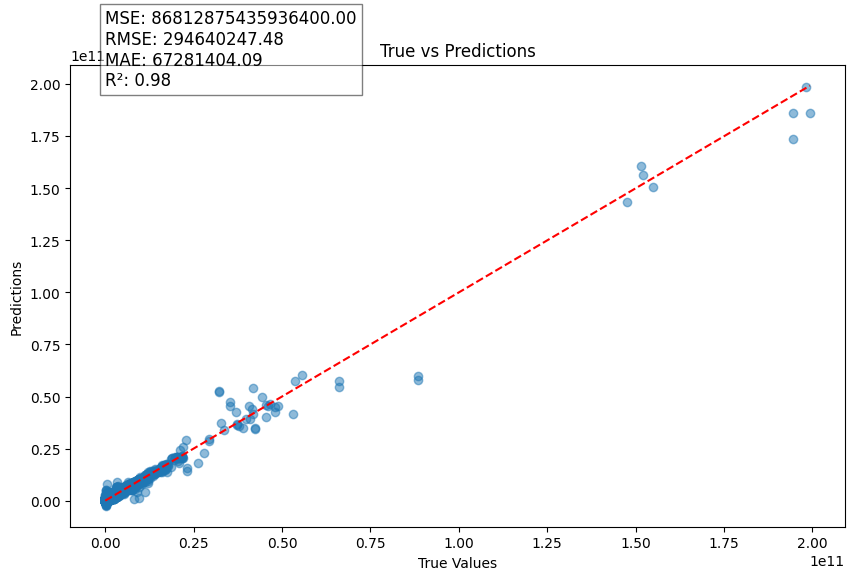

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평가 지표 계산
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² (R-squared): {r2}")
# 산점도 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # y=x 선
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predictions')
plt.text(min(y_true), max(y_true), f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [22]:
# 조회 조건
admi_cty_no = 41210510
card_tpbuz_cd = 'D02'
amt = 633562  # 예측에서는 사용되지 않음
cnt = 28
total_population = 13850.98
운영점포평균영업기간 = 188.5
폐업점포평균영업기간 = 358.0
상권변동지표구분 = 'HH'
data = pd.DataFrame(data)
# 조건을 만족하는 행 조회
result = data.query(
    f'admi_cty_no == {admi_cty_no} and '
    f'card_tpbuz_cd == "{card_tpbuz_cd}" and '
    f'cnt == {cnt} and '
    f'TOTAL_POPULATION == {total_population} and '
    f'운영점포평균영업기간 == {운영점포평균영업기간} and '
    f'폐업점포평균영업기간 == {폐업점포평균영업기간} and '
    f'상권변동지표구분 == "{상권변동지표구분}"'
)

In [23]:
result

,admi_cty_no,card_tpbuz_cd,amt,cnt,TOTAL_POPULATION,운영점포평균영업기간,폐업점포평균영업기간,상권변동지표구분
0,41210510,Y02,633562,28,13850.98,188.5,358.0,HH


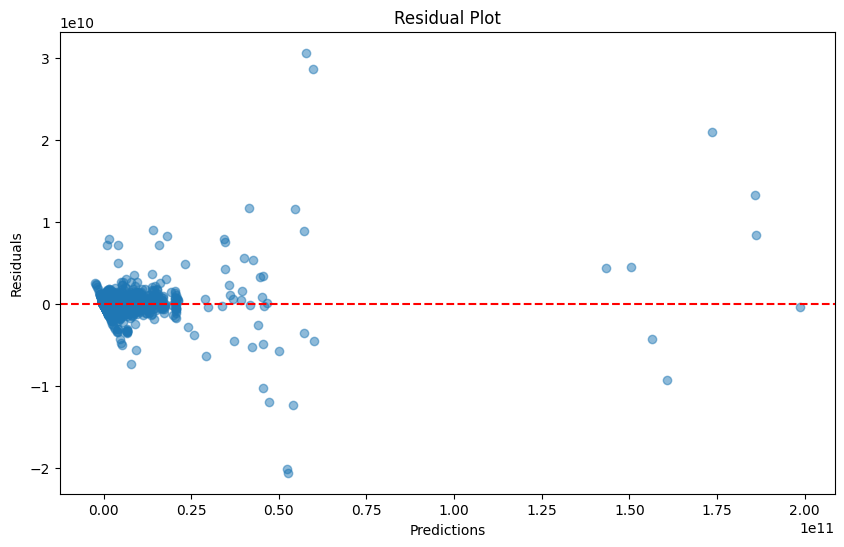

In [27]:
# 잔차 계산
residuals = y_true - y_pred

# 잔차 플롯
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

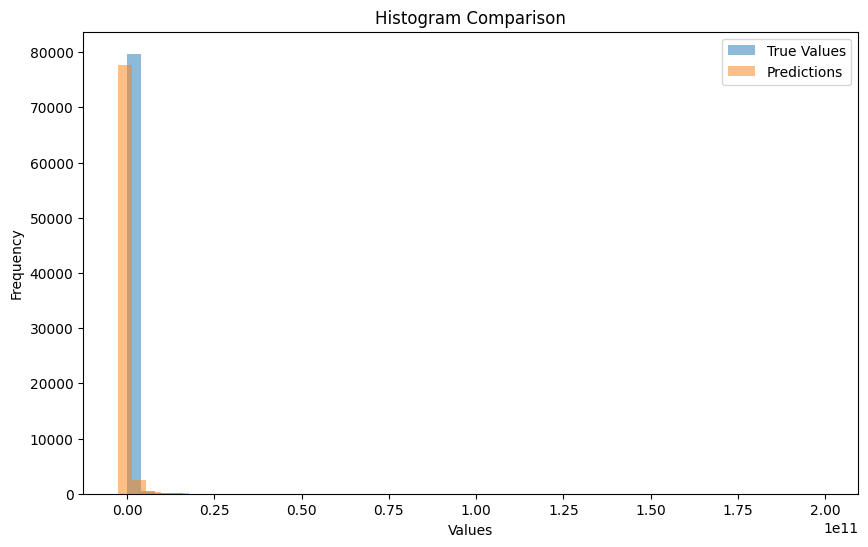

In [29]:
# 히스토그램 비교
plt.figure(figsize=(10, 6))
plt.hist(y_true, bins=50, alpha=0.5, label='True Values')
plt.hist(y_pred, bins=50, alpha=0.5, label='Predictions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Comparison')
plt.legend()
plt.show()